In [30]:
#1 Wikipedia Page View API
import requests
import json
import pandas

In [31]:
##1.1 Identify a famous person who has been famous for at least a few years and that you have some personal interest in. Use the Wikimedia API to collect page view data from the English Wikipedia article on that person. Now use that data to generate a time-series visualization and include a link to it in your notebook.
#vivienne westwood
import requests

def get_wikipedia_pageviews(page_title):
    url = ("https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/" +
           f"en.wikipedia.org/all-access/user/{page_title}/daily/2001010100/2023042400")

    headers = {
        'User-Agent': 'python data collection bot by lcai9@uw.edu'
    }

    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error {response.status_code}: Unable to fetch data for {page_title}")
        return None

page_title = "Vivienne_Westwood"
pageviews_data = get_wikipedia_pageviews(page_title)
print(pageviews_data)

{'items': [{'project': 'en.wikipedia', 'article': 'Vivienne_Westwood', 'granularity': 'daily', 'timestamp': '2015070100', 'access': 'all-access', 'agent': 'user', 'views': 636}, {'project': 'en.wikipedia', 'article': 'Vivienne_Westwood', 'granularity': 'daily', 'timestamp': '2015070200', 'access': 'all-access', 'agent': 'user', 'views': 774}, {'project': 'en.wikipedia', 'article': 'Vivienne_Westwood', 'granularity': 'daily', 'timestamp': '2015070300', 'access': 'all-access', 'agent': 'user', 'views': 617}, {'project': 'en.wikipedia', 'article': 'Vivienne_Westwood', 'granularity': 'daily', 'timestamp': '2015070400', 'access': 'all-access', 'agent': 'user', 'views': 542}, {'project': 'en.wikipedia', 'article': 'Vivienne_Westwood', 'granularity': 'daily', 'timestamp': '2015070500', 'access': 'all-access', 'agent': 'user', 'views': 560}, {'project': 'en.wikipedia', 'article': 'Vivienne_Westwood', 'granularity': 'daily', 'timestamp': '2015070600', 'access': 'all-access', 'agent': 'user', 'v

In [39]:

with open("wp_pageviews_viviennewestwood.json", 'w') as my_file:
    data_string = json.dumps(pageviews_data)
    print(data_string, file=my_file)
    
with open("wp_pageviews_viviennewestwood.json", 'r') as input_file:
    input_data = input_file.read()    
new_data = json.loads(input_data)
def clean_up_timestamp(day): 
    new_time_stamp = day[0:4] + "-" + day[4:6] + "-" + day[6:8]
    return new_time_stamp

views_by_day = {}
for day_dict in new_data['items']:
    day = clean_up_timestamp(day_dict['timestamp'])
    views_by_day[day] = day_dict['views']
    
    
with open('view_by_day_viviennewestwood.tsv', 'w') as output_file:
    print("day\tviews", file=output_file)
    for day in views_by_day:
        print(f"{day}\t{views_by_day[day]}", file=output_file)


#link== https://docs.google.com/spreadsheets/d/1Gs-TtlB6BvP1ECK7SDhTTzkRYBq9Lwb6Lu_ReVTQDJc/edit?usp=sharing

In [40]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


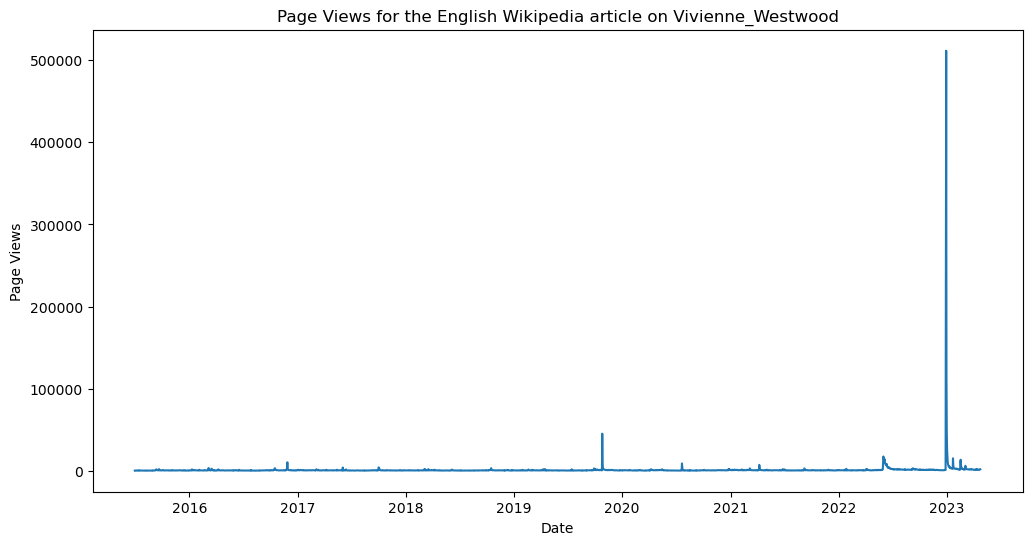

None


In [41]:
import pandas
import matplotlib.pyplot as plt

# Assuming pageviews_data is the JSON data returned from the previous function
def visualize_pageviews(pageviews_data):
    P_dataframe = pandas.DataFrame(pageviews_data['items'])
    P_dataframe['timestamp'] = pandas.to_datetime( P_dataframe['timestamp'], format="%Y%m%d%H")
    P_dataframe.set_index('timestamp', inplace=True)

    plt.figure(figsize=(12, 6))
    plt.plot( P_dataframe.index,  P_dataframe['views'])
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title(f"Page Views for the English Wikipedia article on {pageviews_data['items'][0]['article']}")
    plt.show()

print(visualize_pageviews(pageviews_data))

In [42]:
##1.2 Identify 2 other languages editions of Wikipedia that have articles on that person. Collect page view data on the article in other languages and create a single visualization that shows how the dynamics and similar and/or different. (Note: My approach involved creating a TSV file with multiple columns.)
chinese_title = "维维恩·韦斯特伍德"
french_title = "Vivienne_Westwood"


chinese_pageviews_data = get_wikipedia_pageviews(chinese_title)
french_pageviews_data = get_wikipedia_pageviews(french_title)

combined_pageviews_data = {
    'English': pageviews_data,
    'Chinese': chinese_pageviews_data,
    'French': french_pageviews_data
}

japanese_title = "ヴィヴィアン・ウエストウッド"
japanese_pageviews_data = get_wikipedia_pageviews(japanese_title)

combined_pageviews_data = {
    'English': pageviews_data,
    'Chinese': chinese_pageviews_data,
    'French': french_pageviews_data,
    'Japanese': japanese_pageviews_data
}

Error 404: Unable to fetch data for 维维恩·韦斯特伍德


In [43]:
with open("wp_pageviews_combined_viviennewestwood.json", 'w') as my_file:
    data_string = json.dumps(combined_pageviews_data)
    print(data_string, file=my_file)

with open("wp_pageviews_combined_viviennewestwood.json", 'r') as input_file:
    input_data = input_file.read()
new_data = json.loads(input_data)

def clean_up_timestamp(day):
    new_time_stamp = day[0:4] + "-" + day[4:6] + "-" + day[6:8]
    return new_time_stamp

def process_data(language_data):
    views_by_day = {}
    for day_dict in language_data['items']:
        day = clean_up_timestamp(day_dict['timestamp'])
        views_by_day[day] = day_dict['views']
    return views_by_day

english_views_by_day = process_data(new_data['English'])
japanese_views_by_day = process_data(new_data['Japanese'])
french_views_by_day = process_data(new_data['French'])


with open('view_by_day_combined_viviennewestwood.tsv', 'w') as output_file:
    print("day\tEnglish\tFrench\tJapanese", file=output_file)
    for day in english_views_by_day:
        english_views = english_views_by_day.get(day, 0)
        french_views = french_views_by_day.get(day, 0)
        japanese_views = japanese_views_by_day.get(day, 0)
        print(f"{day}\t{english_views}\t{french_views}\t{japanese_views}", file=output_file)

In [54]:
##1.3 Collect page view data on the articles about Marvel Comics and DC Comics in English Wikipedia. (If you'd rather replace these examples with some other comparison of popular rivals, that's just as good!)
marvel_title = "Marvel_Comics"
dc_title = "DC_Comics"
marvel_pageviews_data = get_wikipedia_pageviews(marvel_title)
dc_pageviews_data = get_wikipedia_pageviews(dc_title)

with open("wp_pageviews_Marvel_Comics.json", 'w') as my_Mfile:
    mdata_string = json.dumps(marvel_pageviews_data)
    print(mdata_string, file=my_Mfile)
with open("wp_pageviews_DC_Comics.json", 'w') as my_DCfile:
    DCdata_string = json.dumps(dc_pageviews_data)
    print(DCdata_string, file=my_DCfile)

In [64]:
###1.3.1 Which has more total page views in 2022?

import json

with open("wp_pageviews_Marvel_Comics.json", 'r') as marvel_file:
    marvel_data = json.load(marvel_file)

with open("wp_pageviews_DC_Comics.json", 'r') as dc_file:
    dc_data = json.load(dc_file)

marvel_items = marvel_data['items']
dc_items = dc_data['items']

def filter_data_for_2022(items):
    filtered_items = [item for item in items if item['timestamp'].startswith("202201") or item['timestamp'].startswith("202202") or item['timestamp'].startswith("202203") or item['timestamp'].startswith("202204") or item['timestamp'].startswith("202205") or item['timestamp'].startswith("202206") or item['timestamp'].startswith("202207") or item['timestamp'].startswith("202208") or item['timestamp'].startswith("202209") or item['timestamp'].startswith("202210") or item['timestamp'].startswith("202211") or item['timestamp'].startswith("202212")]
    return filtered_items

marvel_2022 = filter_data_for_2022(marvel_items)
dc_2022 = filter_data_for_2022(dc_items)

total_marvel_views = sum(item['views'] for item in marvel_2022)
total_dc_views = sum(item['views'] for item in dc_2022)

print(f"Total Marvel Comics page views in 2022: {total_marvel_views}")
print(f"Total DC Comics page views in 2022: {total_dc_views}")

if total_marvel_views > total_dc_views:
    print("Marvel Comics had more total page views in 2022.")
elif total_marvel_views < total_dc_views:
    print("DC Comics had more total page views in 2022.")
else:
    print("Marvel Comics and DC Comics had the same total page views in 2022.")


Total Marvel Comics page views in 2022: 1804195
Total DC Comics page views in 2022: 1793582
Marvel Comics had more total page views in 2022.


In [52]:
###1.3.2 Can you draw a visualization in a spreadsheet that shows this? (Again, provide a link.)
marvel_by_date = {}
for item in marvel_2022:
    marvel_by_date[item['timestamp'][:8]] = item['views']

dc_by_date = {}
for item in dc_2022:
    dc_by_date[item['timestamp'][:8]] = item['views']

def clean_up_timestamp(day): 
    new_time_stamp = day[0:4] + "-" + day[4:6] + "-" + day[6:8]
    return new_time_stamp

for date in marvel_by_date.keys():
    marvel_views = marvel_by_date.get(date, 0)
for date in dc_by_date.keys():    
    dc_views = dc_by_date.get(date, 0)
    
combined_data = {}   
combined_data[date] = {
        'Marvel_views': marvel_views,
        'DC_views': dc_views,
        'Total_views': marvel_views + dc_views
    }

with open('combined_pageviews_2022_Marvel_DC.tsv', 'w') as output_file:
    print("Date\tMarvel_views\tDC_views\tTotal_views", file=output_file)
    for date in sorted(combined_data.keys()):
        views_data = combined_data[date]
        cleaned_date = clean_up_timestamp(date)
        print(f"{cleaned_date}\t{views_data['Marvel_views']}\t{views_data['DC_views']}\t{views_data['Total_views']}", file=output_file)

#https://docs.google.com/spreadsheets/d/1gE2mYnKFROXG0pGoiE7kYjZczXa5780aFENJwi1Hg2k/edit?usp=sharing

In [70]:
###1.3.3 Where there years since 2015 when the less viewed page was viewed more? How many and which ones?
def filter_data_by_year(items, year):
    filtered_items = [item for item in items if item['timestamp'].startswith(str(year))]
    return filtered_items

years = range(2015, 2023)

for year in years:
    marvel_filtered_year = filter_data_by_year(marvel_items, year)
    dc_filtered_year = filter_data_by_year(dc_items, year)
    
    marvel_views_year = sum(item['views'] for item in marvel_filtered_year)
    dc_views_year = sum(item['views'] for item in dc_filtered_year)
    print(f"in {year},Marvel views is {marvel_views_year}")
    print(f"in {year},DC views is {dc_views_year}" )

    if dc_views_year > marvel_views_year:
        print(f"In {year}, DC Comics had more page views than Marvel Comics.")

in 2015,Marvel views is 901007
in 2015,DC views is 824561
in 2016,Marvel views is 1982087
in 2016,DC views is 2003131
In 2016, DC Comics had more page views than Marvel Comics.
in 2017,Marvel views is 1670161
in 2017,DC views is 1623985
in 2018,Marvel views is 2707650
in 2018,DC views is 1810590
in 2019,Marvel views is 2099570
in 2019,DC views is 1696735
in 2020,Marvel views is 1227661
in 2020,DC views is 1299000
In 2020, DC Comics had more page views than Marvel Comics.
in 2021,Marvel views is 1878513
in 2021,DC views is 1528781
in 2022,Marvel views is 1804195
in 2022,DC views is 1793582


In [77]:
###1.3.4 Where their any months was this true? How many and which ones?

def filter_data_by_year_month(items, year, month):
    filtered_items = [item for item in items if item['timestamp'].startswith(f"{year}{month:02d}")]
    return filtered_items

years = range(2015, 2023)
months = range(1, 13)

dc_won_months_count = 0
for year in years:
    for month in months:
        marvel_filtered_year_month = filter_data_by_year_month(marvel_items, year, month)
        dc_filtered_year_month = filter_data_by_year_month(dc_items, year, month)

        marvel_views_year_month = sum(item['views'] for item in marvel_filtered_year_month)
        dc_views_year_month = sum(item['views'] for item in dc_filtered_year_month)

        if dc_views_year_month > marvel_views_year_month:
            dc_won_months_count += 1
            print(f"In {year}-{month:02d}, DC Comics had more page views than Marvel Comics.")

print(f"DC Comics had more page views than Marvel Comics in {dc_won_months_count} months.")

In 2015-10, DC Comics had more page views than Marvel Comics.
In 2016-03, DC Comics had more page views than Marvel Comics.
In 2016-04, DC Comics had more page views than Marvel Comics.
In 2016-07, DC Comics had more page views than Marvel Comics.
In 2016-08, DC Comics had more page views than Marvel Comics.
In 2016-09, DC Comics had more page views than Marvel Comics.
In 2016-12, DC Comics had more page views than Marvel Comics.
In 2017-06, DC Comics had more page views than Marvel Comics.
In 2017-09, DC Comics had more page views than Marvel Comics.
In 2017-10, DC Comics had more page views than Marvel Comics.
In 2017-11, DC Comics had more page views than Marvel Comics.
In 2019-10, DC Comics had more page views than Marvel Comics.
In 2019-11, DC Comics had more page views than Marvel Comics.
In 2019-12, DC Comics had more page views than Marvel Comics.
In 2020-01, DC Comics had more page views than Marvel Comics.
In 2020-02, DC Comics had more page views than Marvel Comics.
In 2020-

In [80]:
###1.3.5 How about any days? How many?
def filter_data_by_year_month_day(items, year, month, day):
    filtered_items = [item for item in items if item['timestamp'].startswith(f"{year}{month:02d}{day:02d}")]
    return filtered_items

years = range(2015, 2023)
months = range(1, 13)
days = range(1, 32)

dc_won_days_count = 0

for year in years:
    for month in months:
        for day in days:
            marvel_filtered_year_month_day = filter_data_by_year_month_day(marvel_items, year, month, day)
            dc_filtered_year_month_day = filter_data_by_year_month_day(dc_items, year, month, day)

            marvel_views_year_month_day = sum(item['views'] for item in marvel_filtered_year_month_day)
            dc_views_year_month_day = sum(item['views'] for item in dc_filtered_year_month_day)

            if dc_views_year_month_day > marvel_views_year_month_day:
                dc_won_days_count += 1
                print(f"In {year}-{month:02d}-{day:02d}, DC Comics had more page views than Marvel Comics.")

print(f"DC Comics had more page views than Marvel Comics in {dc_won_days_count} days.")


In 2015-07-12, DC Comics had more page views than Marvel Comics.
In 2015-07-13, DC Comics had more page views than Marvel Comics.
In 2015-07-14, DC Comics had more page views than Marvel Comics.
In 2015-07-15, DC Comics had more page views than Marvel Comics.
In 2015-07-16, DC Comics had more page views than Marvel Comics.
In 2015-07-17, DC Comics had more page views than Marvel Comics.
In 2015-07-22, DC Comics had more page views than Marvel Comics.
In 2015-08-24, DC Comics had more page views than Marvel Comics.
In 2015-10-07, DC Comics had more page views than Marvel Comics.
In 2015-10-09, DC Comics had more page views than Marvel Comics.
In 2015-10-13, DC Comics had more page views than Marvel Comics.
In 2015-10-14, DC Comics had more page views than Marvel Comics.
In 2015-10-15, DC Comics had more page views than Marvel Comics.
In 2015-10-16, DC Comics had more page views than Marvel Comics.
In 2015-10-17, DC Comics had more page views than Marvel Comics.
In 2015-10-18, DC Comics 

In 2016-09-12, DC Comics had more page views than Marvel Comics.
In 2016-09-13, DC Comics had more page views than Marvel Comics.
In 2016-09-14, DC Comics had more page views than Marvel Comics.
In 2016-09-15, DC Comics had more page views than Marvel Comics.
In 2016-09-16, DC Comics had more page views than Marvel Comics.
In 2016-09-17, DC Comics had more page views than Marvel Comics.
In 2016-09-18, DC Comics had more page views than Marvel Comics.
In 2016-09-19, DC Comics had more page views than Marvel Comics.
In 2016-09-20, DC Comics had more page views than Marvel Comics.
In 2016-09-21, DC Comics had more page views than Marvel Comics.
In 2016-09-23, DC Comics had more page views than Marvel Comics.
In 2016-09-24, DC Comics had more page views than Marvel Comics.
In 2016-09-25, DC Comics had more page views than Marvel Comics.
In 2016-09-26, DC Comics had more page views than Marvel Comics.
In 2016-09-27, DC Comics had more page views than Marvel Comics.
In 2016-10-14, DC Comics 

In 2017-12-22, DC Comics had more page views than Marvel Comics.
In 2017-12-23, DC Comics had more page views than Marvel Comics.
In 2017-12-24, DC Comics had more page views than Marvel Comics.
In 2017-12-25, DC Comics had more page views than Marvel Comics.
In 2017-12-26, DC Comics had more page views than Marvel Comics.
In 2017-12-31, DC Comics had more page views than Marvel Comics.
In 2018-01-12, DC Comics had more page views than Marvel Comics.
In 2018-01-13, DC Comics had more page views than Marvel Comics.
In 2018-01-17, DC Comics had more page views than Marvel Comics.
In 2018-01-18, DC Comics had more page views than Marvel Comics.
In 2018-01-20, DC Comics had more page views than Marvel Comics.
In 2018-01-24, DC Comics had more page views than Marvel Comics.
In 2018-04-18, DC Comics had more page views than Marvel Comics.
In 2018-07-22, DC Comics had more page views than Marvel Comics.
In 2018-07-23, DC Comics had more page views than Marvel Comics.
In 2018-07-24, DC Comics 

In 2020-01-19, DC Comics had more page views than Marvel Comics.
In 2020-01-20, DC Comics had more page views than Marvel Comics.
In 2020-01-21, DC Comics had more page views than Marvel Comics.
In 2020-01-22, DC Comics had more page views than Marvel Comics.
In 2020-01-23, DC Comics had more page views than Marvel Comics.
In 2020-01-24, DC Comics had more page views than Marvel Comics.
In 2020-01-25, DC Comics had more page views than Marvel Comics.
In 2020-01-26, DC Comics had more page views than Marvel Comics.
In 2020-01-27, DC Comics had more page views than Marvel Comics.
In 2020-01-28, DC Comics had more page views than Marvel Comics.
In 2020-01-29, DC Comics had more page views than Marvel Comics.
In 2020-01-30, DC Comics had more page views than Marvel Comics.
In 2020-01-31, DC Comics had more page views than Marvel Comics.
In 2020-02-01, DC Comics had more page views than Marvel Comics.
In 2020-02-02, DC Comics had more page views than Marvel Comics.
In 2020-02-03, DC Comics 

In 2020-11-28, DC Comics had more page views than Marvel Comics.
In 2020-12-01, DC Comics had more page views than Marvel Comics.
In 2020-12-05, DC Comics had more page views than Marvel Comics.
In 2020-12-06, DC Comics had more page views than Marvel Comics.
In 2020-12-07, DC Comics had more page views than Marvel Comics.
In 2020-12-08, DC Comics had more page views than Marvel Comics.
In 2020-12-15, DC Comics had more page views than Marvel Comics.
In 2020-12-16, DC Comics had more page views than Marvel Comics.
In 2020-12-18, DC Comics had more page views than Marvel Comics.
In 2020-12-19, DC Comics had more page views than Marvel Comics.
In 2020-12-20, DC Comics had more page views than Marvel Comics.
In 2020-12-21, DC Comics had more page views than Marvel Comics.
In 2020-12-22, DC Comics had more page views than Marvel Comics.
In 2020-12-23, DC Comics had more page views than Marvel Comics.
In 2020-12-24, DC Comics had more page views than Marvel Comics.
In 2020-12-25, DC Comics 

In 2021-10-16, DC Comics had more page views than Marvel Comics.
In 2021-10-17, DC Comics had more page views than Marvel Comics.
In 2021-10-18, DC Comics had more page views than Marvel Comics.
In 2022-02-20, DC Comics had more page views than Marvel Comics.
In 2022-02-22, DC Comics had more page views than Marvel Comics.
In 2022-02-23, DC Comics had more page views than Marvel Comics.
In 2022-02-24, DC Comics had more page views than Marvel Comics.
In 2022-02-25, DC Comics had more page views than Marvel Comics.
In 2022-02-26, DC Comics had more page views than Marvel Comics.
In 2022-02-27, DC Comics had more page views than Marvel Comics.
In 2022-02-28, DC Comics had more page views than Marvel Comics.
In 2022-03-01, DC Comics had more page views than Marvel Comics.
In 2022-03-02, DC Comics had more page views than Marvel Comics.
In 2022-03-03, DC Comics had more page views than Marvel Comics.
In 2022-03-04, DC Comics had more page views than Marvel Comics.
In 2022-03-05, DC Comics 

In 2022-12-28, DC Comics had more page views than Marvel Comics.
In 2022-12-29, DC Comics had more page views than Marvel Comics.
In 2022-12-30, DC Comics had more page views than Marvel Comics.
In 2022-12-31, DC Comics had more page views than Marvel Comics.
DC Comics had more page views than Marvel Comics in 991 days.


In [98]:
##1.4 I've made this file available which includes list of more than 100 Wikipedia articles about alternative rock bands from Washington state that I built from this category in Wikipedia.[*] It's a .jsonl file. Download the file (click "raw" and then save the file onto your drive). Now read it in, and request monthly page view data from all of them. If you need some help with loading it in, I've included some sample code at the bottom of this page.
import json

bands_dicts = []
with open("list_of_washington_alternative_rocks_bands_wikipedia-2023-04-25.jsonl", 'r') as input_file:
    for line in input_file.readlines():
        new_data = json.loads(line)
        bands_dicts.append(new_data)

def get_monthly_pageviews(title, start, end):
    website = ("https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/" +
           f"en.wikipedia.org/all-access/user/{page_title}/monthly/2022010100/2022123100")
    headers = {
        'user': 'python data collection bot by lcai9@uw.edu'
    }

    response = requests.get(website, headers=headers)
    if response.status_code == 200:
        data = response.jsonl()
        return data
    
band_pageviews = {}
for page in bands_dicts:
    page_title = page["page_title"]
    page_views = get_monthly_pageviews(page_title, "2022010100", "2022123100")
    band_pageviews[page_title] = page_views




JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [94]:
###1.4.1 Once you've done this, sum up all of the page views from all of the pages and print out a TSV file with these total numbers.

def clean_up_timestamp(day): 
    new_time_stamp = day[0:4] + "-" + day[4:6] + "-" + day[6:8]
    return new_time_stamp

views_by_month = {}

for page_title, page_data in band_pageviews.items():
    for item in page_data['items']:
        month = clean_up_timestamp(item['timestamp'])[:7]
        if month not in views_by_month:
            views_by_month[month] = item['views']
        else:
            views_by_month[month] += item['views']

with open('total_pageviews_by_month.tsv', 'w') as output_file:
    print("Month\tTotal_Views", file=output_file)
    for month in sorted(views_by_month.keys()):
        print(f"{month}\t{views_by_month[month]}", file=output_file)


NameError: name 'band_pageviews' is not defined

In [ ]:
###1.4.2 You know the routine by now! Now, make a time series graph of these numbers and include a link in your notebook.


In [ ]:
#2 Starting on your projects
#Thank you so much for your feedback and suggestions! after readig that, I revised my old iseas and questions.
#Big idea: Employment and workforce development.
#Users could explore trends in the labor market;requirements for different types of jobs; and employer information. 

#Questions to explore within this subject area:

#What are the current trends in the labor market, including employment rates, job growth, and wage levels in different regions and industries?
#What are the most in-demand skills and qualifications for different types of jobs, and how have they evolved over time?
#How do educational attainment and demographic factors, such as age, gender, and race, influence employment outcomes and wage levels?
#How have AI advancements affected the workforce, and what are the implications for job growth and skill requirements in the future?

#Resources:
#1.the Bureau of Labor Statistics (BLS):comprehensive data on employment, wages, and demographics of the workforce at both the national and regional levels,employment and wage data, job projections, and demographics of the workforce.
#2.job search websites:Indeed, Glassdoor: provide insights into job requirements and skills, 
#3.LinkedIn: provide information on job titles, industries, and qualifications



In [ ]:
##2.1 APIs
#BLS:
#DOCUMENTATION:https://www.bls.gov/developers/api_signature_v2.htm
#specify the series ID, start year, end year, and the data format. Here is an example API endpoint and parameter format to retrieve data on non-farm payroll employment:

#https://api.bls.gov/publicAPI/v2/timeseries/data/CES0000000001?startyear=2020&endyear=2022&registrationkey=your_api_key&format=json

from pybls import RequestParameters, blsAPI
api_key = "api_key"
series_id = "000001"
start_year = "2020"
end_year = "2022"
format_type = "json"

params = RequestParameters(
    series_id=series_id,
    start_year=start_year,
    end_year=end_year,
    format_type=format_type
)

api = blsAPI(api_key)
response = api.get_series_data(params)

print(response.json())


In [ ]:
#Glassdoor:https://www.glassdoor.com/developer/index.htm
#DOCUMENTATION:https://www.glassdoor.com/developer/companiesApiActions.htm
#http://api.glassdoor.com/api/api.htm?v=1&format=json&t.p=your_partner_id&t.k=your_api_key&eact=employers&" + \"action=employers&userip=192.168.43.42&useragent=Mozilla/%2F4.0&employerId=employer_id_here

import glassdoor
import os

api_key = 'your_api_key'
api_client = glassdoor.Glassdoor(api_key=api_key)

company_name = 'Microsoft'
response = api_client.companies(q=company_name)
print(response.json())


#####
import requests

api_url = "http://api.glassdoor.com/api/api.htm"
api_key = "your_api_key_here"
partner_id = "your_partner_id_here"
params = {
    "v": "1",
    "format": "json",
    "t.p": partner_id,
    "t.k": api_key,
    "eact": "employers",
    "action": "employers",
    "userip": "192.168.43.42",
    "useragent": "Mozilla/%2F4.0",
    "q": "Microsoft"
}

response = requests.get(api_url, params=params)

print(response.json())
#Rate limits: The Glassdoor API has a rate limit of 1,200 requests per day per partner account.

In [ ]:
#Trustpilot
#https://developers.trustpilot.com/
#https://api.trustpilot.com/v1/business-units/business_unit_id/reviews?apikey=your_api_key_here&page=1&perPage=20
# https://pypi.org/project/python-trustpilot/ 
from trustpilot import Trustpilot

api_key = 'your_api_key'
api_secret = 'your_api_secret'
business_unit_id = 'business_unit_id'

client = Trustpilot(api_key, api_secret)
reviews = client.get_business_unit_reviews(business_unit_id, per_page=20)
print(reviews)

#Rate limits: The Trustpilot API has a rate limit of 5 requests per second.
#example:
import requests

api_url = "https://api.trustpilot.com/v1/business-units/business_unit_id/reviews"
api_key = "your_api_key_here"
params = {
    "apikey": api_key,
    "page": 1,
    "perPage": 20
}

response = requests.get(api_url, params=params)

print(response.json())


In [ ]:
#Linkedin:https://developer.linkedin.com/docs
#https://api.linkedin.com/v2/organizationPageStatistics?q=organization&organization=urn:li:organization:company_id_here
#python-linkedin (https://pypi.org/project/python-linkedin/) 
from linkedin import linkedin

api_key = 'your_api_key'
api_secret = 'your_api_secret'
access_token = 'your_access_token'
access_secret = 'your_access_secret'

auth = linkedin.LinkedInAuthentication(api_key, api_secret, access_token, access_secret)
app = linkedin.LinkedInApplication(auth)

company_id = 'company_id_here'
fields = ['id', 'name', 'description']
company = app.get_company(company_id, universal_name=None, local_language=None, universal_name_language=None, fields=fields)
print(company)
#Authentication: To access the LinkedIn API, you need to request an API key and access token through the LinkedIn API developer portal (https://developer.linkedin.com/). You will need to create a LinkedIn app and get approval for the app before you can use the API.
#Rate limits: The LinkedIn API has rate limits that vary depending on the endpoint and the type of request. You can find information on the rate limits in the API documentation.
###?????????????if this means we cannot get it?
import requests

api_url = "https://api.linkedin.com/v2/organizationPageStatistics"
api_key = "your_api_key_here"
access_token = "your_access_token_here"
company_id = "company_id_here"
headers = {
    "Authorization": "Bearer " + access_token,
    "Content-Type": "application/json"
}
params = {
    "q": "organization",
    "organization": "urn:li:organization:" + company_id
}

response = requests.get(api_url, headers=headers, params=params)

print(response.json())


In [ ]:
#Handshake:https://joinhandshake.com/api.
#https://joinhandshake.com/api/v1/jobs/:id
#(https://pypi.org/project/handshake/)
from handshake import HandshakeAPI

api_key = 'your_api_key'
api_secret = 'your_api_secret'

api = HandshakeAPI(api_key, api_secret)
job_id = 'job_id_here'
job = api.get_job(job_id)
print(job)
#Rate limits: The Handshake API has rate limits that vary depending on the endpoint and the type of request. You can find information on the rate limits in the API documentation.
import requests

api_url = "https://joinhandshake.com/api/v1/jobs/job_id_here"
api_key = "your_api_key_here"
api_secret = "your_api_secret_here"
headers = {
    "Authorization": "Token " + api_key + ":" + api_secret,
    "Content-Type": "application/json"
}

response = requests.get(api_url, headers=headers)

print(response.json())


In [ ]:
#Indeed
#https://opensource.indeedeng.io/api-documentation/docs/job-search/. 
#https://api.indeed.com/ads/apisearch?publisher=publisher_id_here&v=2&q=#query_here&l=location_here
#https://pypi.org/project/indeed/
from indeed import IndeedClient

client = IndeedClient(publisher='your_publisher_id_here')
params = {
    'q': 'query_here',
    'l': 'location_here',
    'userip': '1.2.3.4',
    'useragent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
search_response = client.search(**params)

print(search_response)
